In [190]:
#Imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.ensemble import AdaBoostClassifier, BaggingRegressor, RandomForestRegressor, RandomForestClassifier


plt.style.use('fivethirtyeight')

In [89]:
#Load in dataset
path = "data/xAPI-Edu-Data.csv"

df = pd.read_csv(path)

print df.shape
df.head(10)

(480, 17)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [90]:
df.columns

Index([u'gender', u'NationalITy', u'PlaceofBirth', u'StageID', u'GradeID',
       u'SectionID', u'Topic', u'Semester', u'Relation', u'raisedhands',
       u'VisITedResources', u'AnnouncementsView', u'Discussion',
       u'ParentAnsweringSurvey', u'ParentschoolSatisfaction',
       u'StudentAbsenceDays', u'Class'],
      dtype='object')

In [95]:
df.rename(index=str, columns= {'NationalITy': 'nationality'}, inplace=True)

In [96]:
df.columns = map(str.lower, df.columns)

## EDA:

In [98]:
df.groupby('placeofbirth').mean()

,raisedhands,visitedresources,announcementsview,discussion
placeofbirth,,,,
Egypt,51.000000,62.666667,50.333333,50.222222
Iran,20.833333,31.000000,25.666667,42.500000
Iraq,73.772727,83.863636,56.636364,50.272727
Jordan,51.051136,63.619318,42.812500,41.596591
KuwaIT,36.216667,40.327778,26.577778,43.477778
Lybia,13.166667,6.333333,8.833333,4.000000
Morocco,58.250000,57.500000,62.250000,48.750000
Palestine,79.700000,85.800000,72.200000,73.500000
SaudiArabia,50.812500,52.250000,36.125000,46.062500


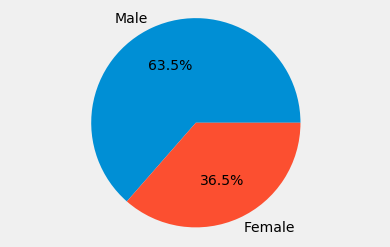

In [99]:
plt.pie(df['gender'].value_counts().tolist(),
       labels=['Male','Female'],
       autopct='%1.1f%%')
axis = plt.axis('equal')

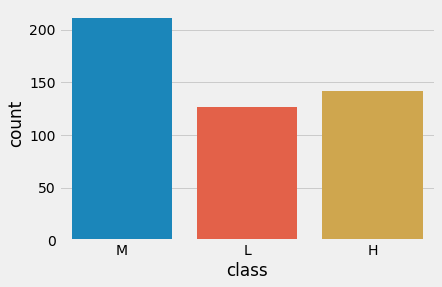

In [102]:
sns.countplot(x='class', data=df)



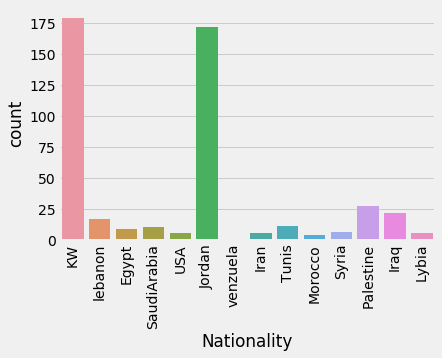

In [108]:
# Exploring nationalities
nation = sns.countplot(x='nationality', data=df)
nation.set(xlabel='Nationality')
plt.setp(nation.get_xticklabels(), rotation=90)
plt.show()

In [114]:
pd.crosstab(df['class'],df['gender'], normalize='index')

gender,F,M
class,,
H,0.528169,0.471831
L,0.188976,0.811024
M,0.360190,0.639810


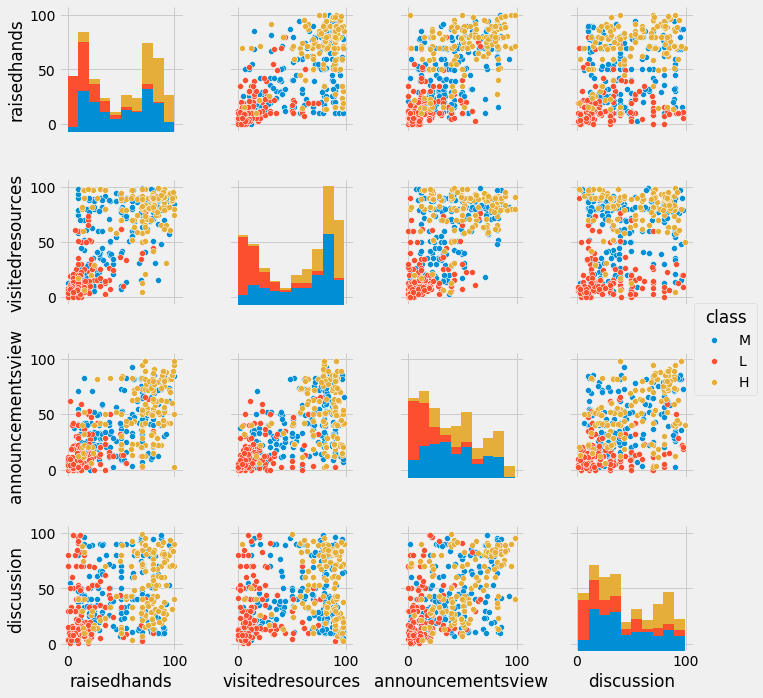

In [116]:
sns.pairplot(df, hue='class')

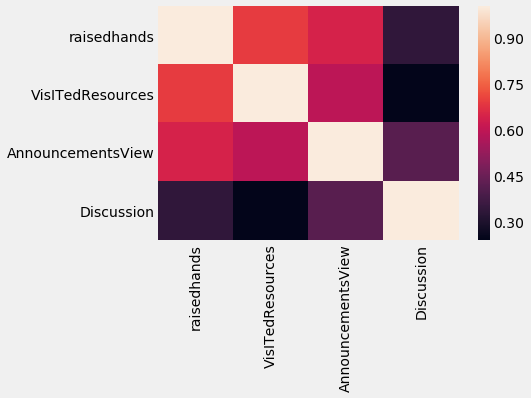

In [70]:
sns.heatmap(df.corr())

## Models

In [118]:
df.head()

,gender,nationality,placeofbirth,stageid,gradeid,sectionid,topic,semester,relation,raisedhands,visitedresources,announcementsview,discussion,parentansweringsurvey,parentschoolsatisfaction,studentabsencedays,class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [136]:
y = df['class']

X = df.drop(['class'], axis = 1)


In [137]:
X.dtypes.pipe(lambda Features: Features[Features=='object']).index

Index([u'gender', u'nationality', u'placeofbirth', u'stageid', u'gradeid',
       u'sectionid', u'topic', u'semester', u'relation',
       u'parentansweringsurvey', u'parentschoolsatisfaction',
       u'studentabsencedays'],
      dtype='object')

In [138]:
le = LabelEncoder()
obj_col = X.dtypes.pipe(lambda Features: Features[Features=='object']).index
for c in obj_col:
    X[c] = le.fit_transform(X[c])

In [144]:
def convert_to_binary(string_var):
    if string_var == "M":
        return 1
    elif string_var == "H":
        return 1
    else:
        return 0

yb = y.map(convert_to_binary)

In [151]:
yb.value_counts(normalize=True)

1    0.735417
0    0.264583
Name: class, dtype: float64

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, yb, test_size = .25, random_state = 21)
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
test_score = accuracy_score(y_test, pred)

print ("test score = {}".format(test_score))

lr = LogisticRegression()
lr.fit(X,yb)

test score = 0.891666666667


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [165]:
coef = pd.DataFrame(zip(X.columns, np.transpose(lr.coef_[0])), columns = ['coef', 'value'])
coef.value = abs(coef.value)
coef_odds = np.e**(coef["value"])
coef["odds_ratio"] = coef_odds
coef.sort_values(['value','odds_ratio'], ascending=[1,0])

,coef,value,odds_ratio
8,relation,0.003270,1.003276
12,discussion,0.007301,1.007327
10,visitedresources,0.028939,1.029362
9,raisedhands,0.032075,1.032595
11,announcementsview,0.036724,1.037406
6,topic,0.057424,1.059105
5,sectionid,0.126683,1.135058
2,placeofbirth,0.210355,1.234115
1,nationality,0.272135,1.312764
14,parentschoolsatisfaction,0.325401,1.384586


## Ada Boost


In [180]:
estimators = range(75, 300, 25)

cv_scores = []

for est in estimators:
    model = AdaBoostClassifier(n_estimators = est)
    score = cross_val_score(model, X, y, cv = 5, scoring = "accuracy").mean()
    cv_scores.append(score)

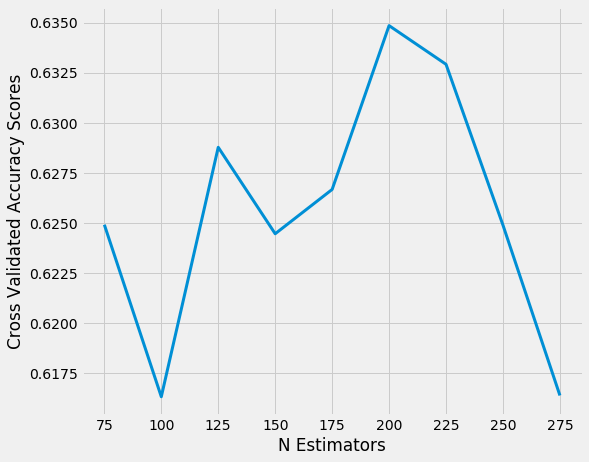

In [181]:
plt.figure(figsize= (8, 7))
plt.plot(estimators, cv_scores, linewidth = 3)
plt.xlabel("N Estimators")
plt.ylabel("Cross Validated Accuracy Scores");

In [182]:
sorted(zip(cv_scores, estimators), reverse = True)[0]

(0.6348593132315324, 200)

## RF

In [194]:
rfreg = RandomForestRegressor()

estimator_range = range(10, 210, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators. Will take a while.

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, yb, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))


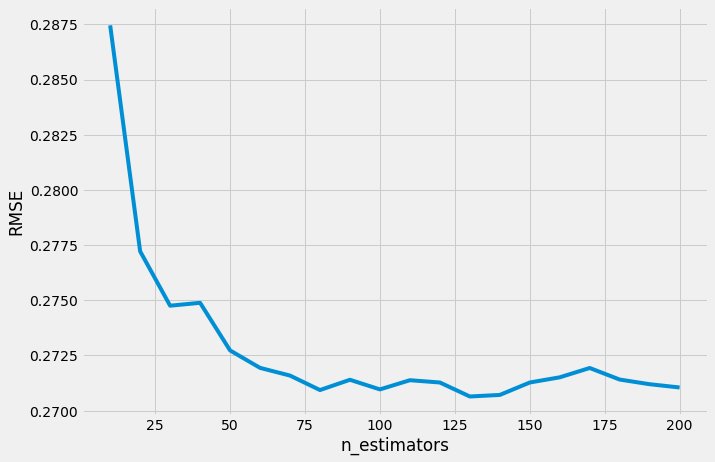

In [195]:
plt.figure(figsize=(10, 7))
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [196]:
sorted(zip(RMSE_scores, estimator_range))[0]


(0.27064379286480406, 130)

In [198]:

# list of values to try for max_features
feature_range = range(1, len(X.columns)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 5-fold cross-validation with each value of max_features
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=130, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, yb, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

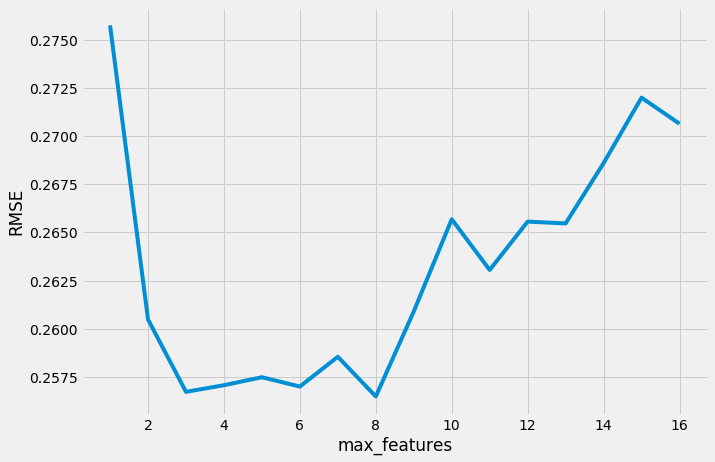

In [199]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE');

In [200]:
sorted(zip(RMSE_scores, feature_range))[0]

(0.25648652184222104, 8)

In [201]:
rfreg = RandomForestRegressor(n_estimators=130, 
                              max_features=8,
                              oob_score=True,
                              random_state=1)
rfreg.fit(X, yb)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=130, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [202]:
pd.DataFrame({'feature':X.columns,
              'importance':rfreg.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
10,visitedresources,0.292373
15,studentabsencedays,0.224527
9,raisedhands,0.166809
11,announcementsview,0.116427
12,discussion,0.057451
13,parentansweringsurvey,0.036017
6,topic,0.023065
1,nationality,0.019906
4,gradeid,0.013061
0,gender,0.011095
